# Analyzing Cost of Living

Dataset: https://www.kaggle.com/datasets/heidarmirhajisadati/regional-cost-of-living-analysis/data

This notebook includes data preprocessing, visualizations and predicting cost of living.

## Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
cost_of_living = pd.read_csv("Cost_of_Living_and_Income_Extended.csv")
df = cost_of_living.copy()

In [4]:
df.head()

,Country,Year,Average_Monthly_Income,Cost_of_Living,Housing_Cost_Percentage,Tax_Rate,Savings_Percentage,Healthcare_Cost_Percentage,Education_Cost_Percentage,Transportation_Cost_Percentage,Region
0,Australia,2013,3483.92,1106.07,32.09,27.50,1.74,18.23,6.94,17.19,Oceania
1,India,2019,7771.03,5422.78,25.21,29.30,3.35,17.21,12.42,9.90,Asia
2,Russia,2004,6991.30,3972.36,40.85,22.94,15.48,15.28,7.10,9.59,Europe
3,South Africa,2011,6628.04,6755.75,30.38,15.69,8.03,6.66,11.76,11.04,Africa
4,Brazil,2015,2434.27,2656.36,49.27,12.44,25.06,9.34,3.63,15.09,South America


Here we can see our columns and some values. Let's examine the dataset in more detail.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country                         500 non-null    object 
 1   Year                            500 non-null    int64  
 2   Average_Monthly_Income          500 non-null    float64
 3   Cost_of_Living                  500 non-null    float64
 4   Housing_Cost_Percentage         500 non-null    float64
 5   Tax_Rate                        500 non-null    float64
 6   Savings_Percentage              500 non-null    float64
 7   Healthcare_Cost_Percentage      500 non-null    float64
 8   Education_Cost_Percentage       500 non-null    float64
 9   Transportation_Cost_Percentage  500 non-null    float64
 10  Region                          500 non-null    object 
dtypes: float64(8), int64(1), object(2)
memory usage: 43.1+ KB


In [6]:
df.nunique()

Country                            12
Year                               24
Average_Monthly_Income            500
Cost_of_Living                    499
Housing_Cost_Percentage           461
Tax_Rate                          467
Savings_Percentage                453
Healthcare_Cost_Percentage        433
Education_Cost_Percentage         409
Transportation_Cost_Percentage    425
Region                              6
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,500.0,2011.51400,7.018284,2000.00,2005.0000,2012.000,2018.0000,2023.00
Average_Monthly_Income,500.0,4291.24824,2179.217333,534.74,2322.3600,4391.585,6233.7575,7984.51
Cost_of_Living,500.0,3716.23212,1922.160530,432.60,1967.7900,3803.205,5265.9675,6996.13
Housing_Cost_Percentage,500.0,34.97370,8.657032,20.10,27.2350,35.170,42.5675,49.95
Tax_Rate,500.0,22.40090,10.025412,5.00,14.7425,22.275,30.9050,39.92
Savings_Percentage,500.0,14.92708,8.813210,0.00,7.5250,14.950,22.4275,29.84
Healthcare_Cost_Percentage,500.0,12.38182,4.269823,5.01,8.4875,12.365,16.2225,19.99
Education_Cost_Percentage,500.0,8.40844,3.775455,2.00,5.2850,8.245,11.5950,14.94
Transportation_Cost_Percentage,500.0,12.47594,4.219147,5.06,8.7525,12.665,15.9525,19.97


In [8]:
df.isna().sum()

Country                           0
Year                              0
Average_Monthly_Income            0
Cost_of_Living                    0
Housing_Cost_Percentage           0
Tax_Rate                          0
Savings_Percentage                0
Healthcare_Cost_Percentage        0
Education_Cost_Percentage         0
Transportation_Cost_Percentage    0
Region                            0
dtype: int64

In [9]:
df["Country"].value_counts()

Country
Mexico           56
United States    51
Japan            47
Australia        46
South Africa     43
China            40
Brazil           39
France           39
India            38
Canada           38
Germany          33
Russia           30
Name: count, dtype: int64

In [10]:
df["Region"].value_counts()

Region
North America    145
Asia             125
Europe           102
Oceania           46
Africa            43
South America     39
Name: count, dtype: int64

In [22]:
df[df["Region"] == "North America"]["Country"].value_counts()

Country
Mexico           56
United States    51
Canada           38
Name: count, dtype: int64

## Outliers Check

In [23]:
numeric_columns = df.select_dtypes(include=["int64", "float64"])

In [24]:
numeric_columns.shape

(500, 9)

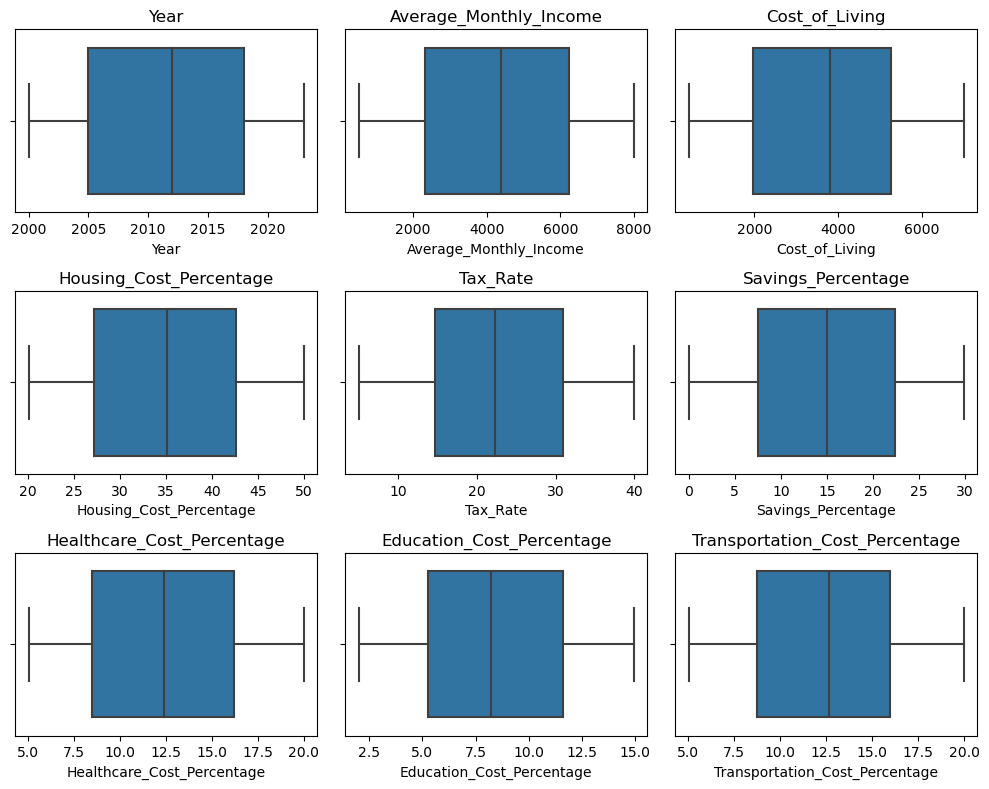

In [25]:
fig, axes = plt.subplots(3, 3, figsize=(10, 8))

for i, column in enumerate(numeric_columns):
    sns.boxplot(x=df[column], ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(column)
    
plt.tight_layout()
plt.show()

Looks like we don't have outliers.

## Visual Analysis

In [26]:
df.dtypes

Country                            object
Year                                int64
Average_Monthly_Income            float64
Cost_of_Living                    float64
Housing_Cost_Percentage           float64
Tax_Rate                          float64
Savings_Percentage                float64
Healthcare_Cost_Percentage        float64
Education_Cost_Percentage         float64
Transportation_Cost_Percentage    float64
Region                             object
dtype: object

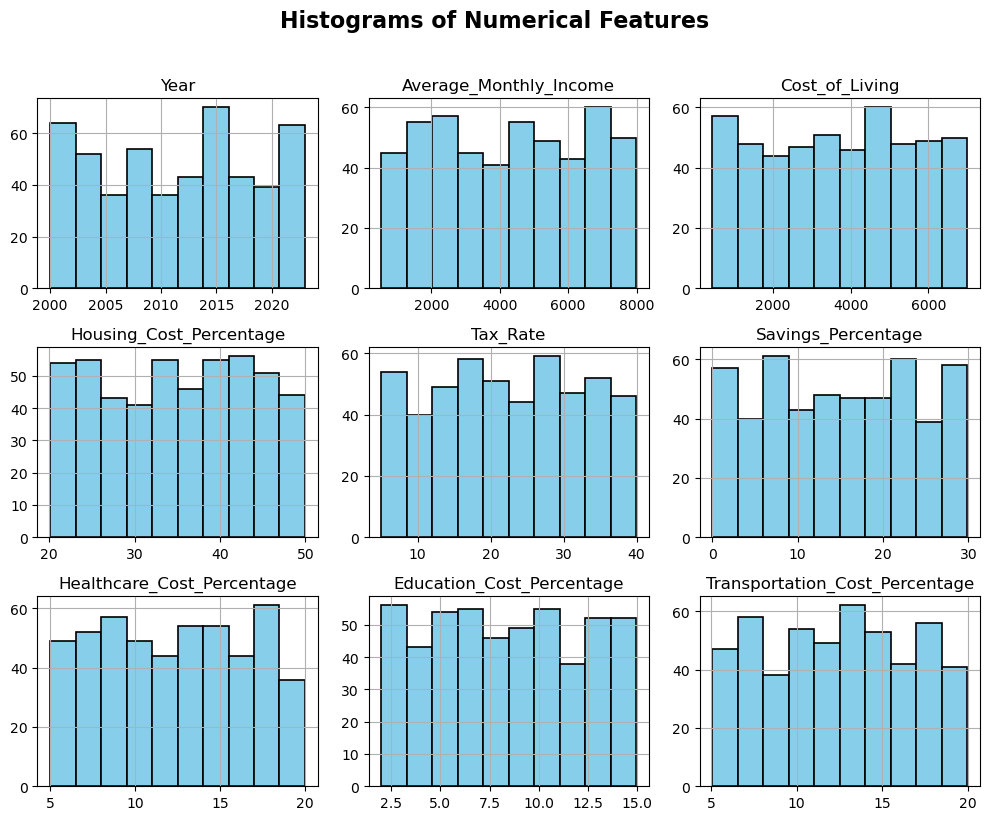

In [45]:
numeric_columns.hist(figsize=(10, 8), color="skyblue", edgecolor="black", linewidth=1.2)
plt.suptitle("Histograms of Numerical Features", fontsize=16, fontweight="bold", y=1.02)

plt.tight_layout()
plt.show()

In [63]:
avg_inc_ordered = df.groupby("Region")["Average_Monthly_Income"].mean().sort_values(ascending=False).index
avg_cost_ordered = df.groupby("Region")["Cost_of_Living"].mean().sort_values(ascending=False).index

In [58]:
avg_inc_ordered_by_reg = df.groupby("Region")["Average_Monthly_Income"].mean().sort_values(ascending=False)
avg_cost_ordered_by_reg = df.groupby("Region")["Cost_of_Living"].mean().sort_values(ascending=False)

In [59]:
print(avg_inc_ordered_by_reg)

Region
Africa           4594.056512
South America    4460.241026
Asia             4397.923440
Oceania          4355.336304
Europe           4164.602549
North America    4132.792621
Name: Average_Monthly_Income, dtype: float64


In [60]:
print(avg_cost_ordered_by_reg)

Region
Oceania          4029.740652
South America    3802.170769
Asia             3770.183840
Africa           3684.925814
Europe           3642.394020
North America    3608.374828
Name: Cost_of_Living, dtype: float64


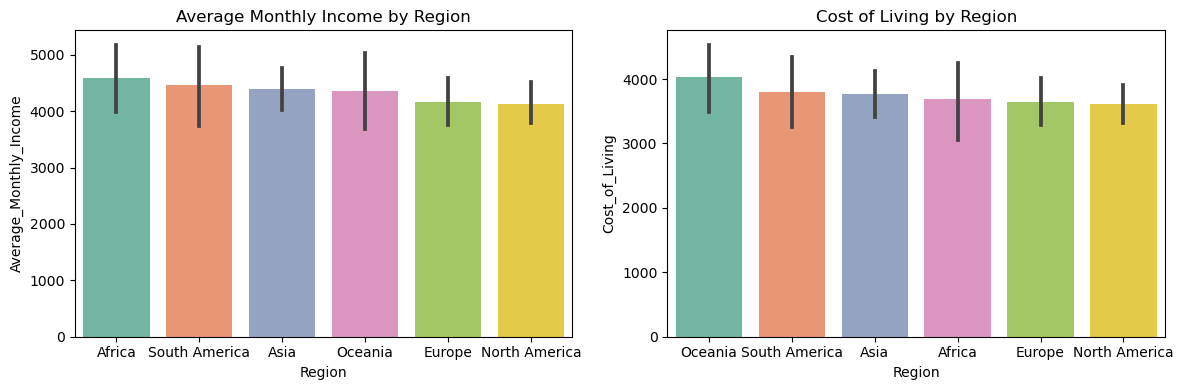

In [102]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

sns.barplot(df, x="Region", y="Average_Monthly_Income", order=avg_inc_ordered, palette="Set2", ax=ax[0])
ax[0].set_title("Average Monthly Income by Region")

sns.barplot(df, x="Region", y="Cost_of_Living", order=avg_cost_ordered, palette="Set2", ax=ax[1])
ax[1].set_title("Cost of Living by Region")

plt.tight_layout()
plt.show()

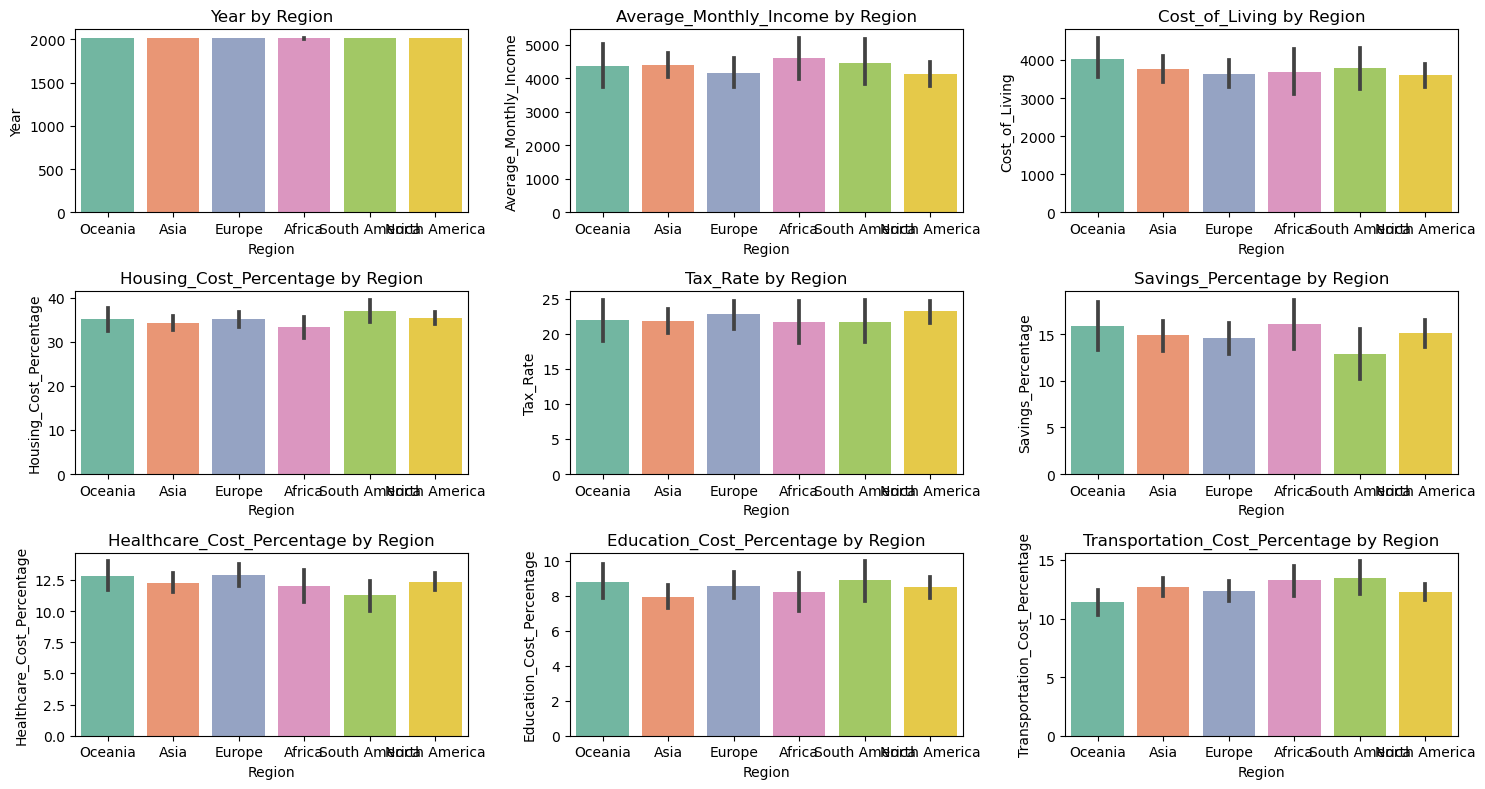

In [95]:
fig, axes = plt.subplots(3, 3, figsize=(15, 8))

for i, column in enumerate(numeric_columns):
    sns.barplot(x=df["Region"], y=df[column], palette="Set2", ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title("{} by Region".format(column))
    
plt.tight_layout()
plt.show()

In [76]:
na_countries = df[df["Region"] == "North America"]["Country"].value_counts().index

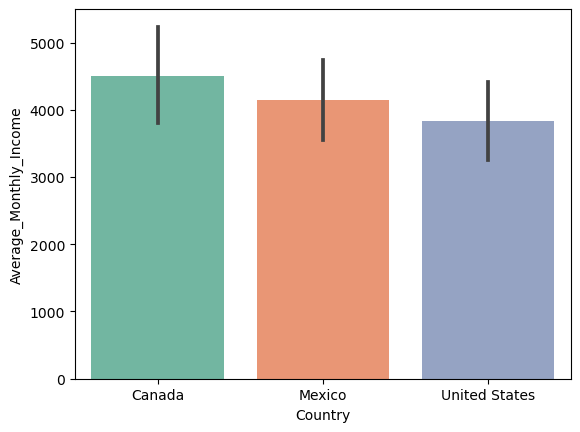

In [80]:
sns.barplot(df[df["Region"] == "North America"], x="Country", y="Average_Monthly_Income", palette="Set2")
plt.show()